# Regression Diagonstics


So you estimated an effect $\hat{\beta}_1$, great! Now, how can I tell if my model fit the data well. We have learned one way, residuals, but now we are going to take a deeper dive into how to diagnose a regression model. 


Remember the LINE assumptions:

Linear

Independence

Normality

Equal Variance (Homoscedastic) 



### What do residuals look like when we violate the linear assumption?

Let's generate some regression data under an y= 2 + 3 x^2 relationship. 

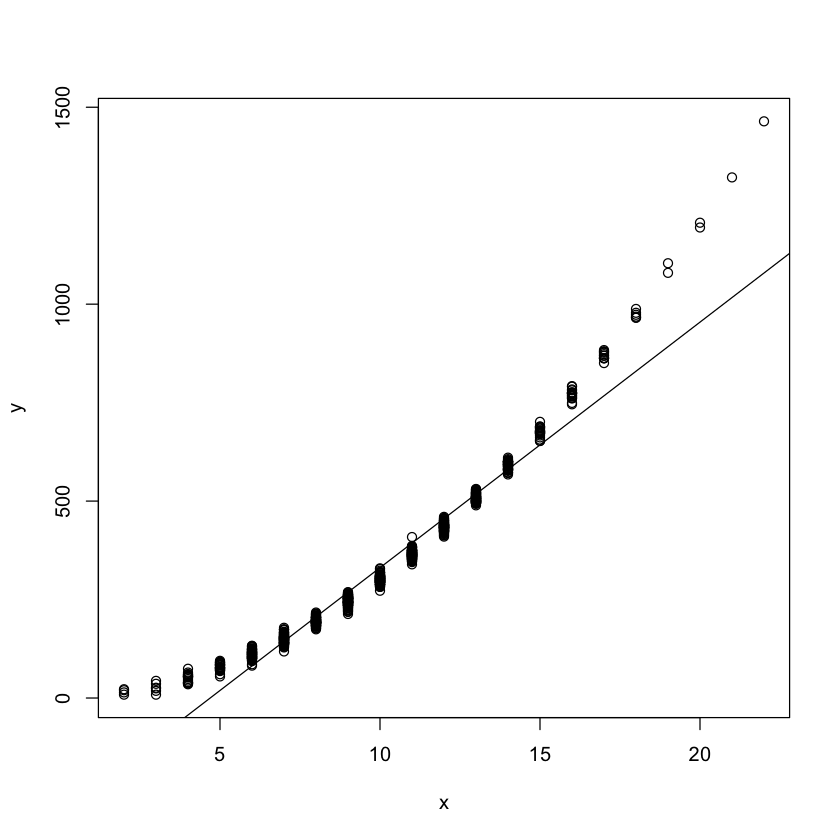

In [118]:
y <- rep(0,1000)
x <- rpois(1000,10)

for (i in 1:1000){
    y[i] <- rnorm(1,2 + 3*x[i]^2,10)
}
plot(x,y)
fit <- lm(y~x)
abline(a=fit$coefficients[1],b=fit$coefficients[2])


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-58.47 -25.06 -13.55  11.45 385.18 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -292.5754     4.5970  -63.65   <2e-16 ***
x             62.3455     0.4389  142.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.85 on 998 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9528 
F-statistic: 2.018e+04 on 1 and 998 DF,  p-value: < 2.2e-16


[1] -13.54866

[1] 2.444267e-15

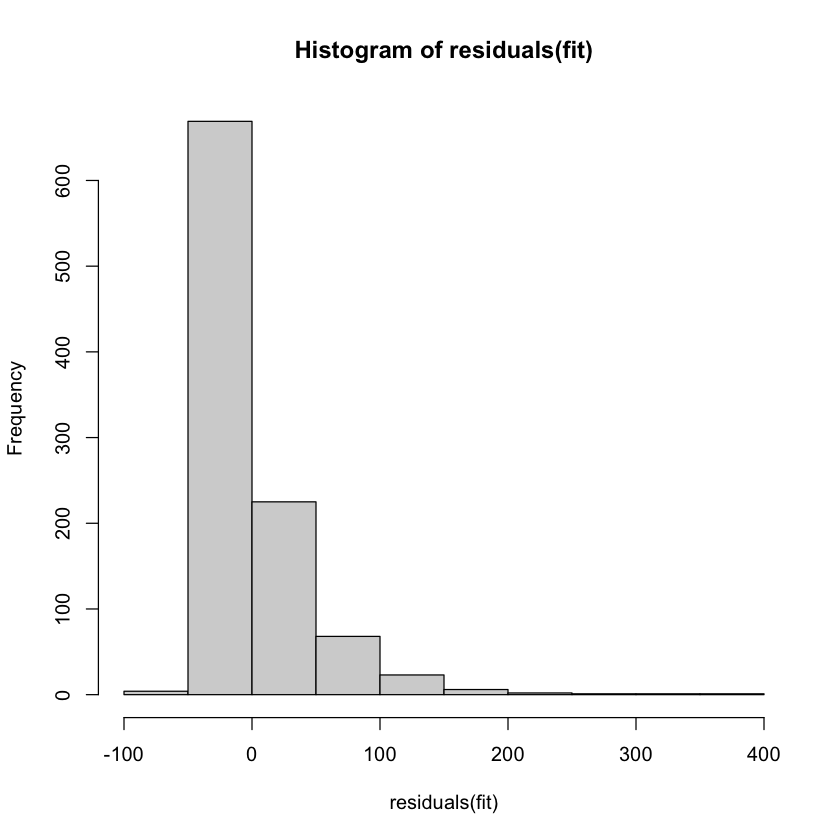

In [125]:
fit <- lm(y~x)

summary(fit)
hist(residuals(fit))
median(residuals(fit))
mean(residuals(fit))


### What do residuals look like when we violate the equal variance assumption?

Let's generate some regression data under an y= 2 + 3 x relationship with changing variance.



$$\hat{\sigma}^2 = \frac{1}{n-p} \sum_i (Y_i -\hat{Y}_i)^2$$ 


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2721.11  -272.53    10.84   262.60  2278.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -47.601     62.612  -0.760    0.447
x              9.516      6.049   1.573    0.116

Residual standard error: 599.6 on 998 degrees of freedom
Multiple R-squared:  0.002473,	Adjusted R-squared:  0.001474 
F-statistic: 2.474 on 1 and 998 DF,  p-value: 0.116


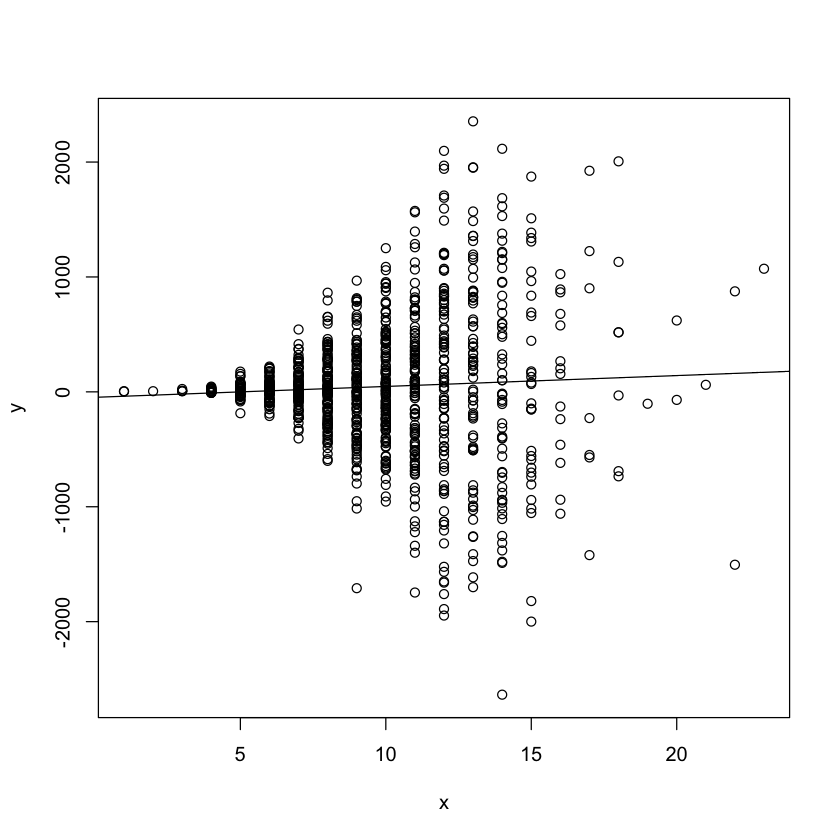

In [134]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))
#print (x)

for (i in 1:1000){
    ### y_i ~ N( 2 + 3*x_i,sigma^2)
    ### y_i ~ 2 + 3*x_i + epsilon where epsilon ~ N(0,sigma^2)
    y[i] <- rnorm(1,2 + 3*x[i],i)
}
plot(x,y)
fit <- lm(y~x)
summary(fit)
abline(a=fit$coefficients[1],b=fit$coefficients[2])

[1] 31.02386

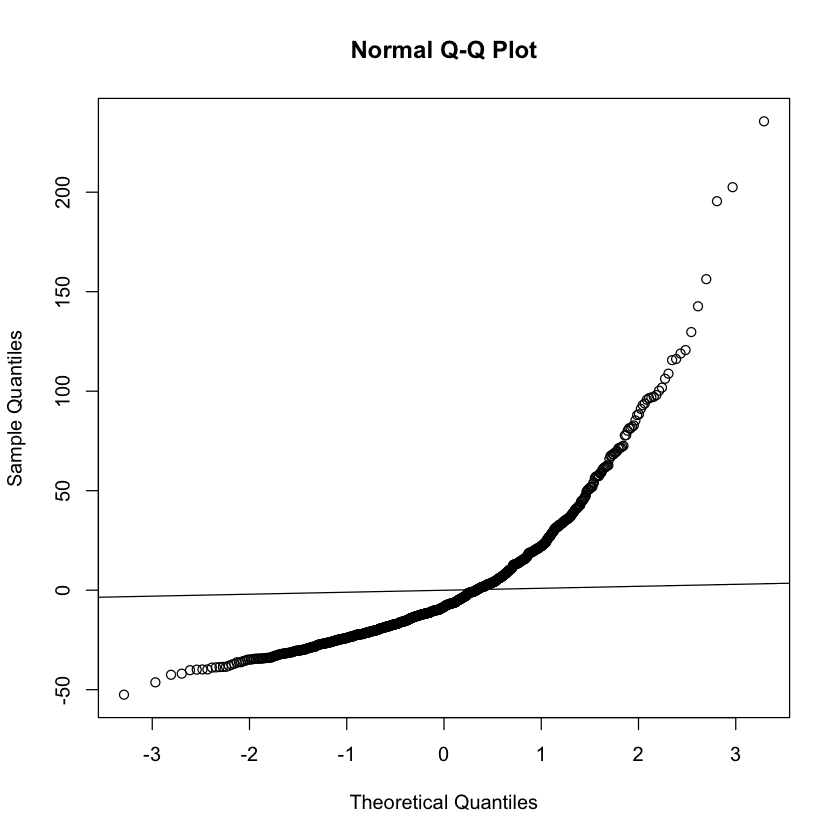

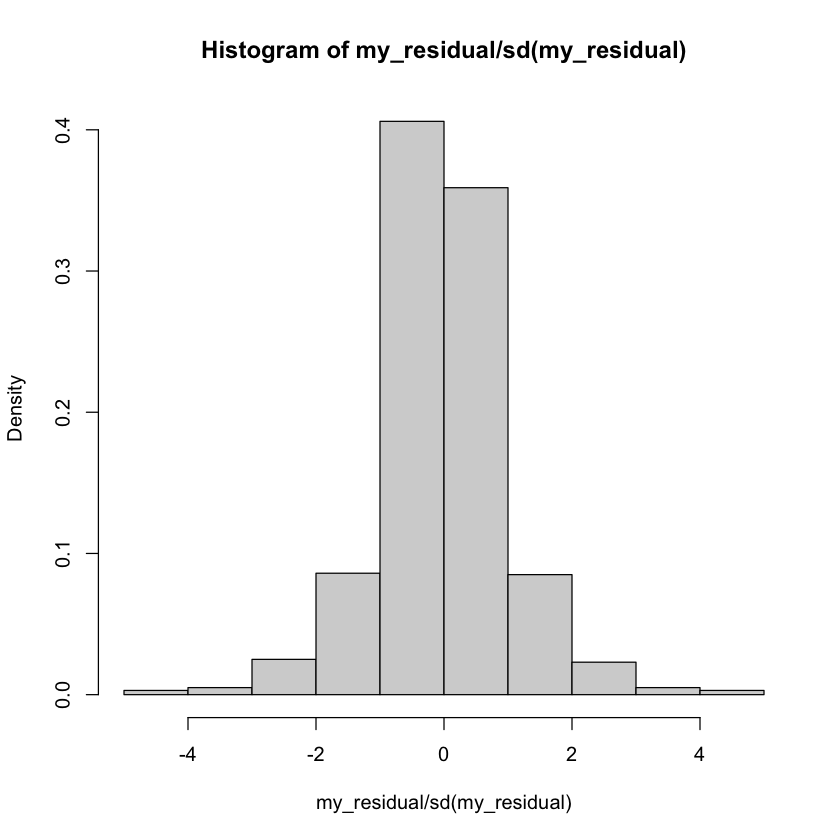

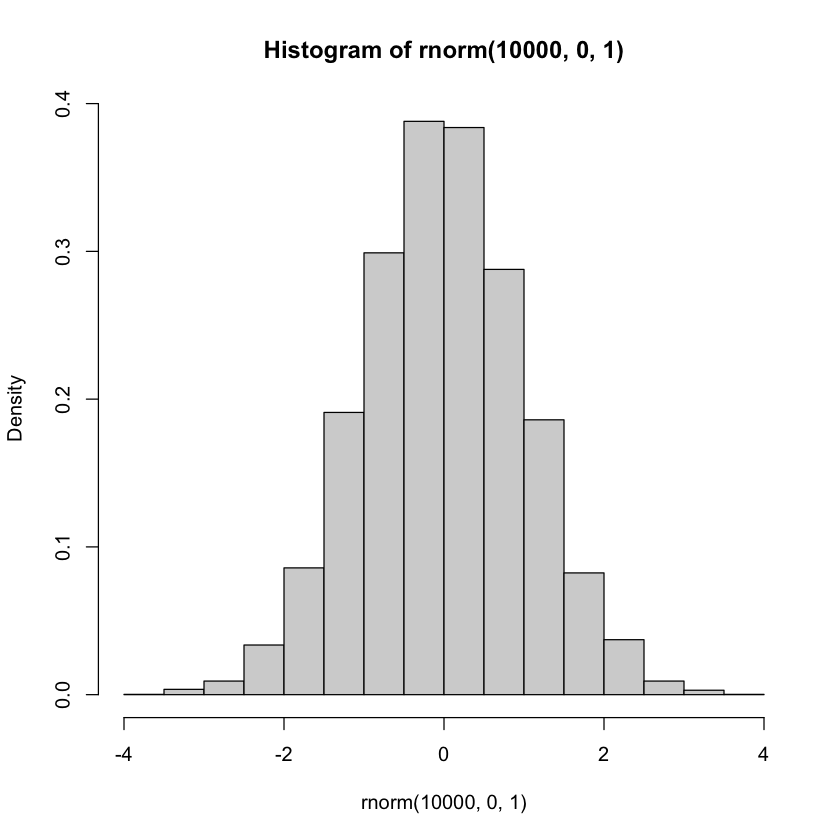

In [164]:
my_residuals <- residuals(lm(y~x))
qqnorm(my_residuals)
abline(a=0,b=1)
summary(lm(y~x))$sigma

hist(my_residual/sd(my_residual),probability = TRUE)
hist(rnorm(10000,0,1),probability = TRUE)

In [20]:
sd(residuals(lm(y~x)))

[1] 560.0611

### What do residuals look like when we violate the Independence assumption?

Let's generate some regression data under an $ y_i= 2 + .5 y_{i-1}$ relationship where y depends on the previous y.


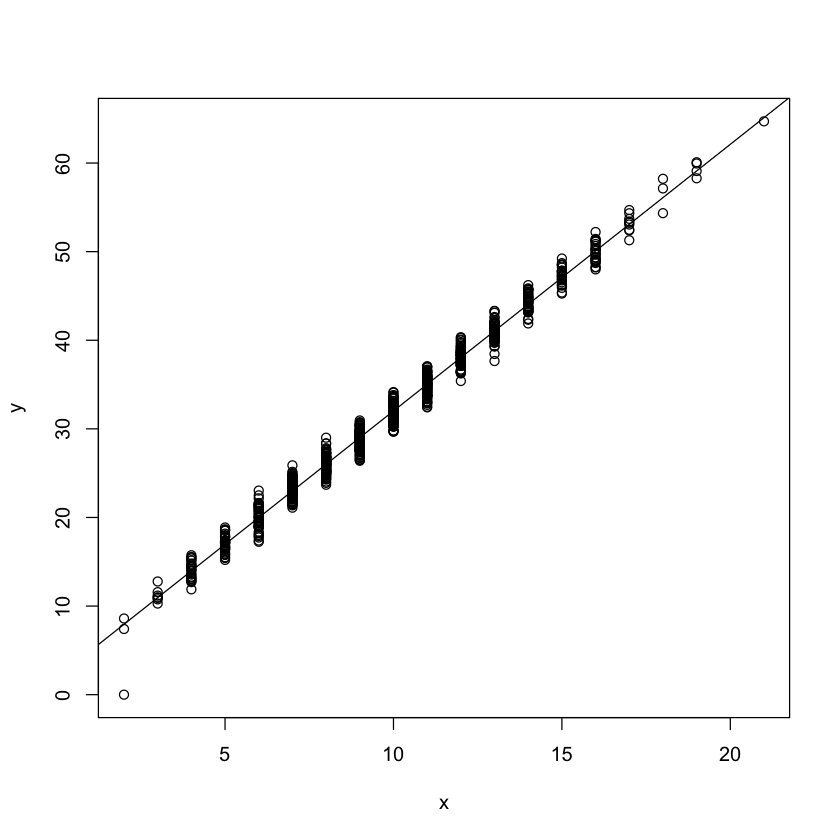

In [155]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))

for (i in 2:1000){
    y[i] <- rnorm(1,2 + 3*x[i] ,1)
}

plot(x,y)
fit <- lm(y~x)
abline(a=fit$coefficients[1],b=fit$coefficients[2])

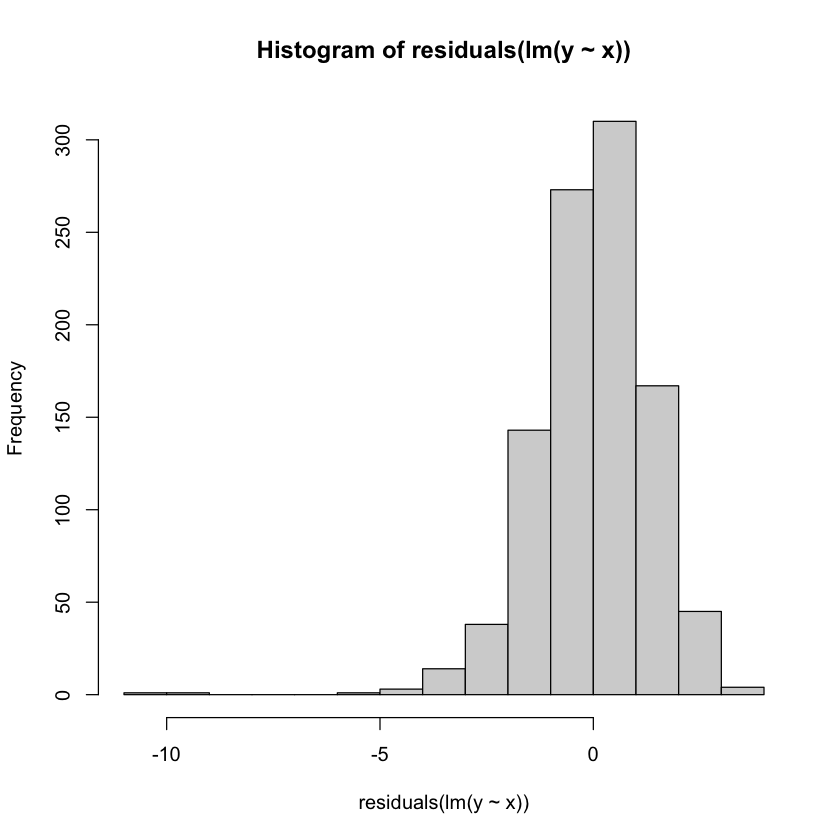

In [136]:
hist(residuals(lm(y~x)))


### What do residuals look like when we violate the normal assumption?

Let's generate some regression data under an y= 2 + 3 x relationship with changing a non-normal distribution.




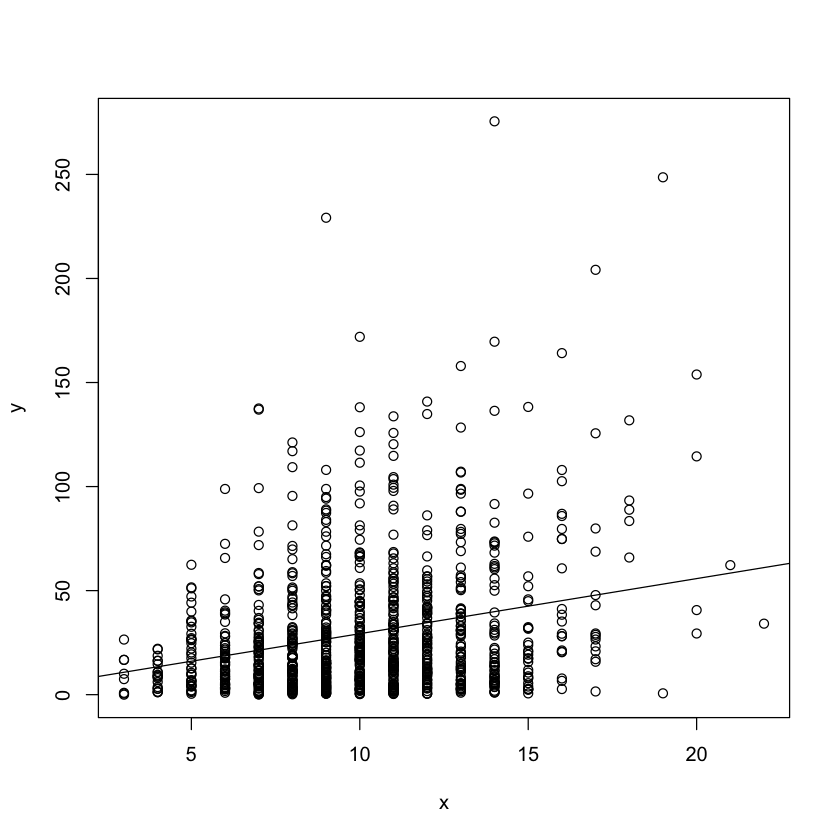

In [157]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))


for (i in 2:1000){
    y[i] <- rexp(1,1/(2 +  3*x[i]))
    #y[i] <- rnorm(1,(2 +  3*x[i]),1)

}


plot(x,y)
fit <- lm(y~x)
abline(a=fit$coefficients[1],b=fit$coefficients[2])

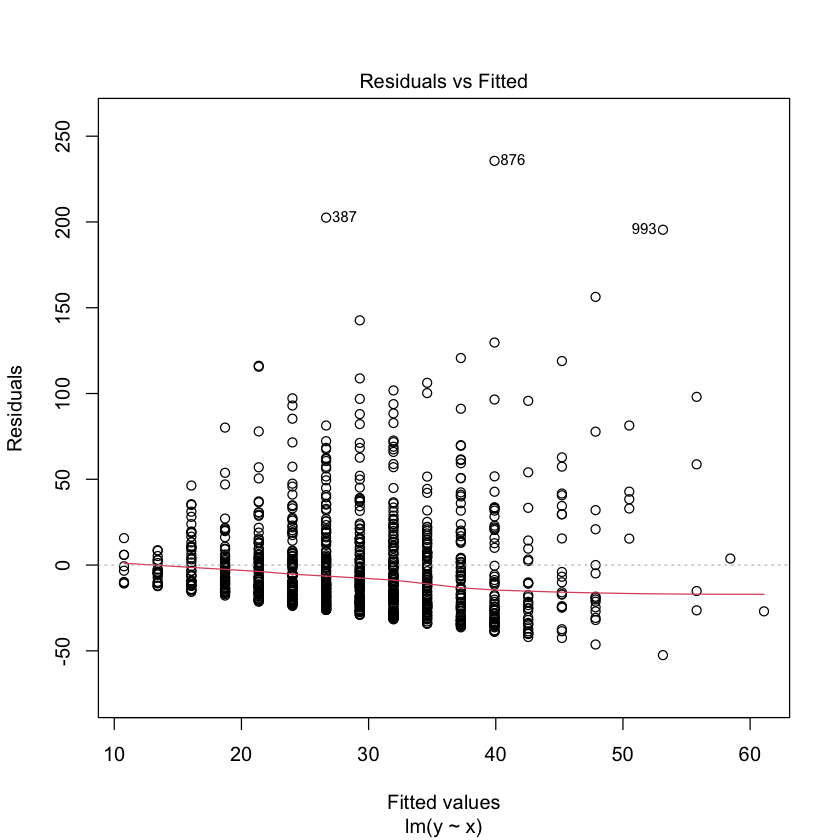

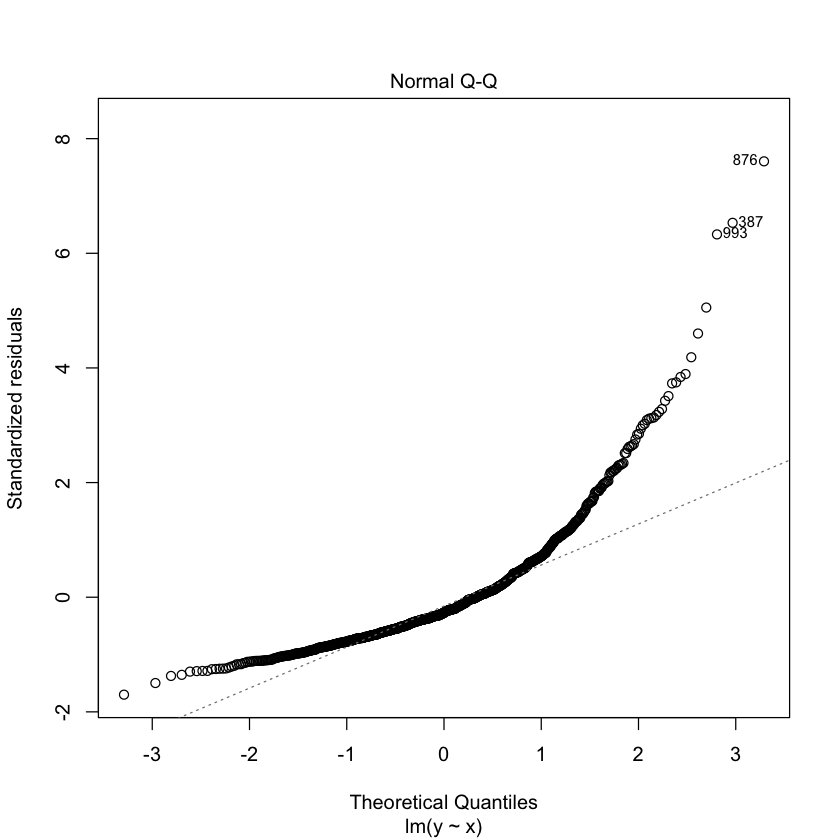

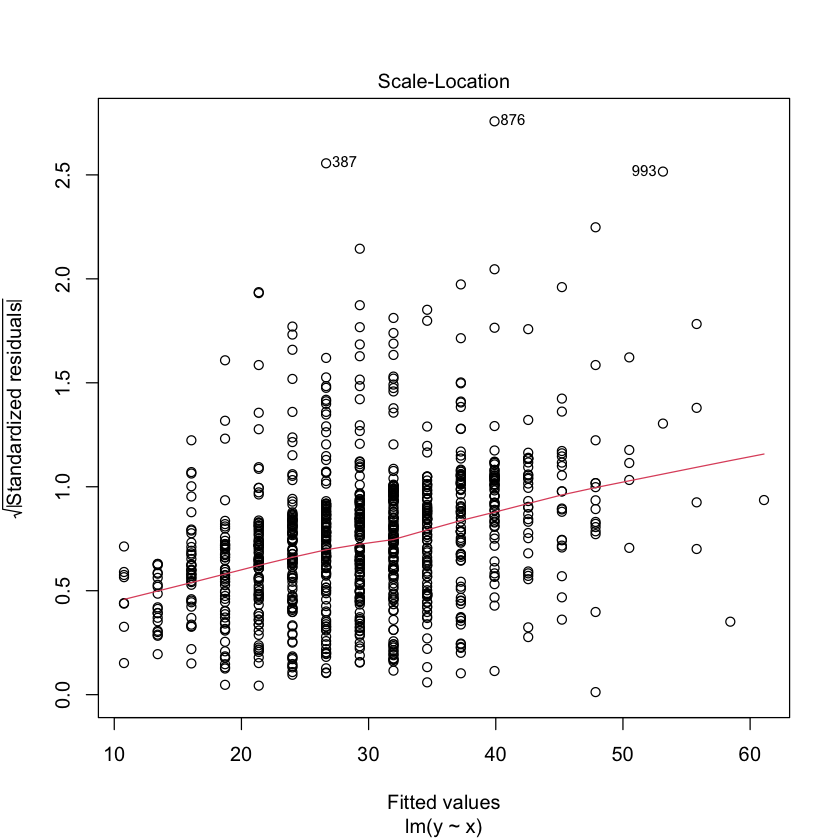

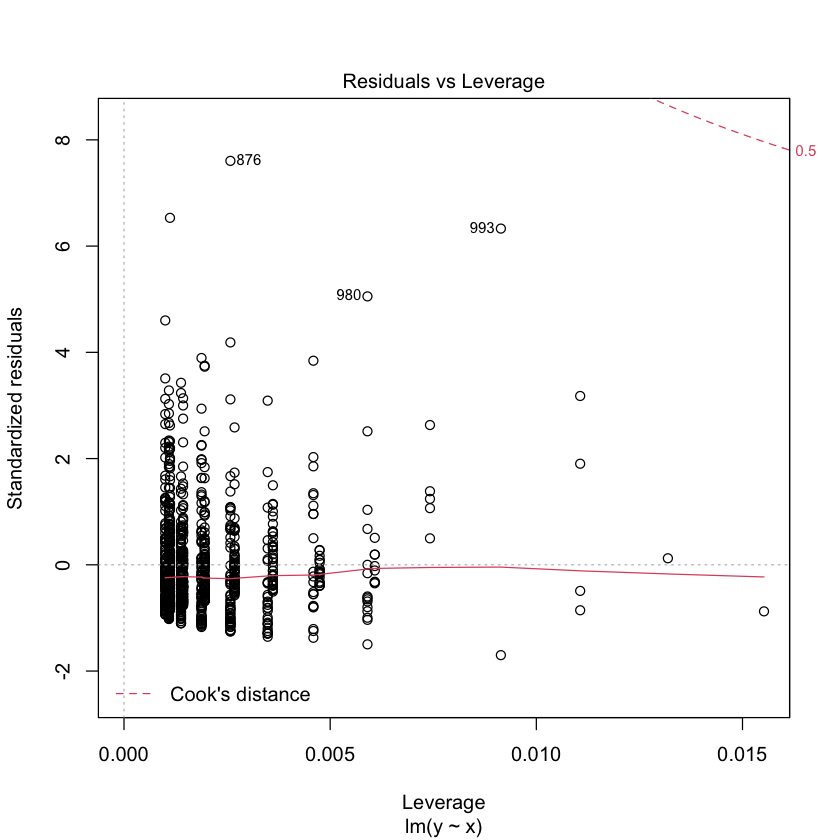

In [158]:

fit <- lm(y~x)
plot(fit)


# Leverage


*Definition* An x value that is far away from the mean of x. 

This is important for identifying influential observations, and deciding whether there is some reason for their ability to influence or "leverage" the results. 



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.772  -6.498  -0.495   6.134  37.069 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.632444   0.307012  106.29   <2e-16 ***
x            0.000383   0.001007    0.38    0.704    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.606 on 1098 degrees of freedom
Multiple R-squared:  0.0001317,	Adjusted R-squared:  -0.000779 
F-statistic: 0.1446 on 1 and 1098 DF,  p-value: 0.7038


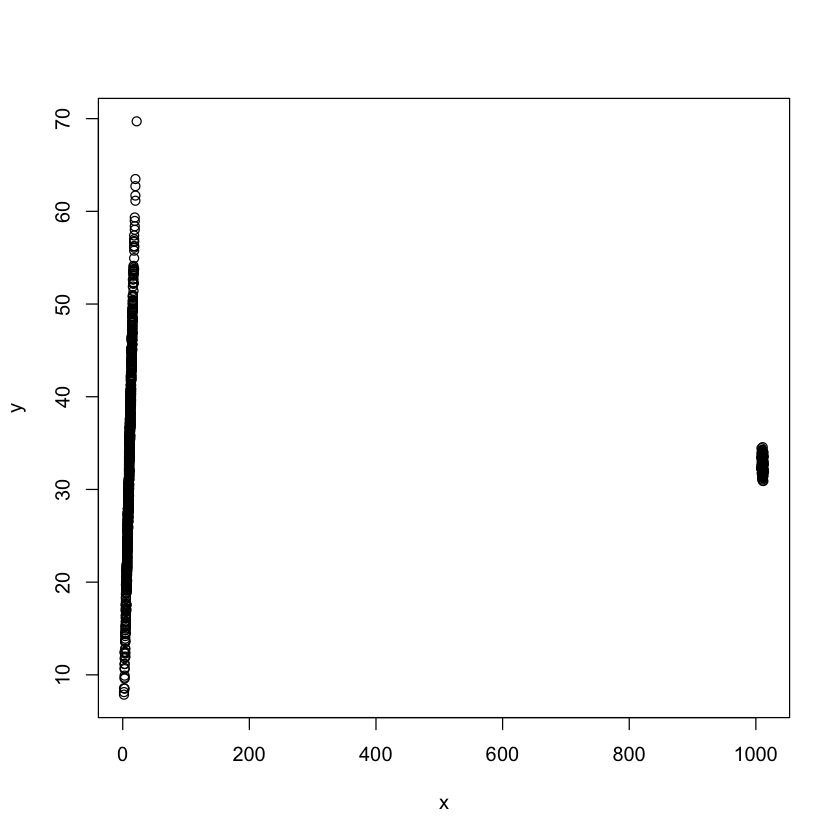

In [1]:
y <- rep(0,1000)
x <- rpois(1000,10)

for (i in 1:1000){
    y[i] <- rnorm(1,2+3*x[i],1)
}

## add in some data points for away from mean of x
y <- c(y,rnorm(100,mean(y),1))
x <- c(x,rnorm(100,mean(x)+1000,1))
summary(lm(y~x))

plot(x,y)

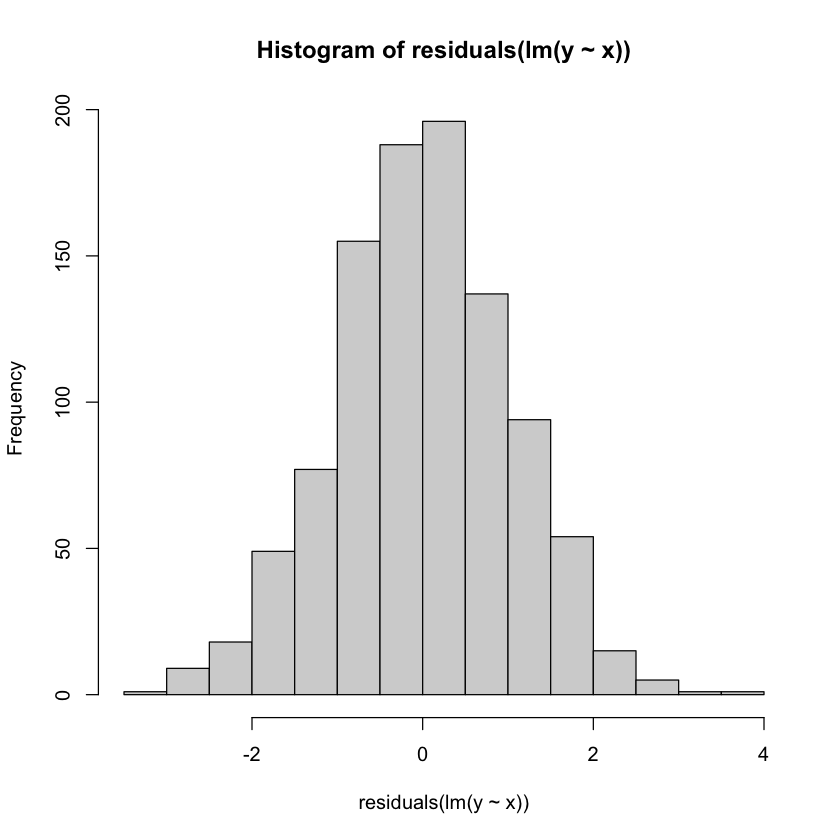

In [102]:
hist(residuals(lm(y~x)))


# QQplot

Residual histograms can't tell us everything about regression diagnostics. Another useful tool is a quantile quantile plot, where a  quantile is value of a distribution such that X\% of the mass of the distribution is within that value. 

### Checkpoint : What is the 95% quantile of the normal distribution?



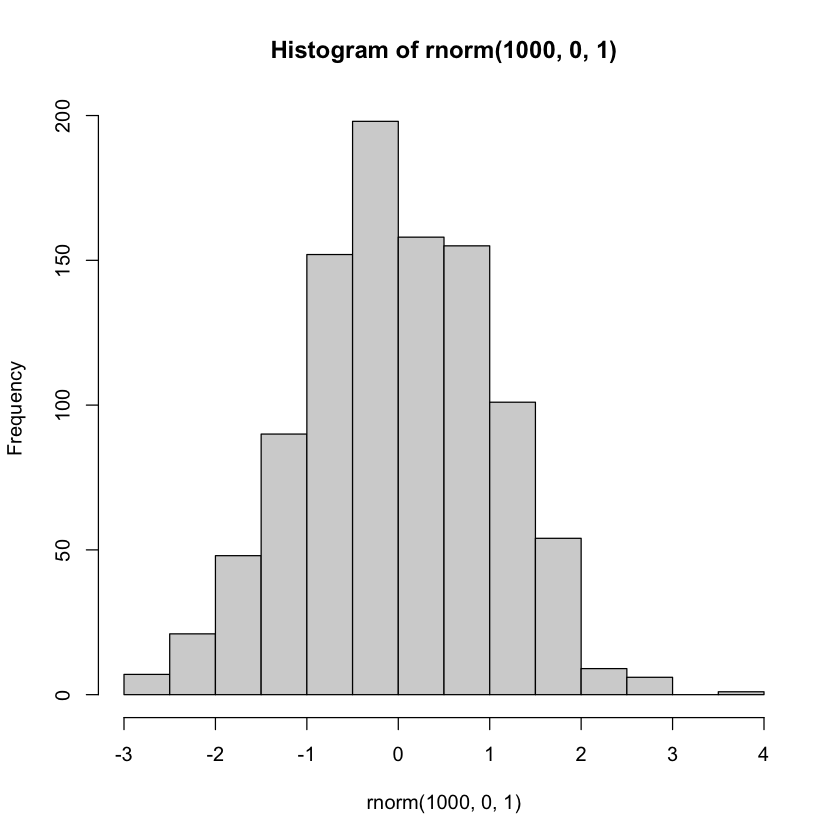

In [107]:
hist(rnorm(1000,0,1))

In [108]:
quantile(rnorm(10000,0,1),probs=.95)

95% 
1.637052

In [110]:
quantile(rnorm(10000,0,1),probs=c(.025,.975))

2.5%     97.5% 
-1.927485  1.984888

Since we know the distribution of residuals is $N(0,\sigma^2)$ we can **standardize** the distribution by dividing by $\sigma$. This yields scaled residuals that follow a $N(0,1)$ distribution.


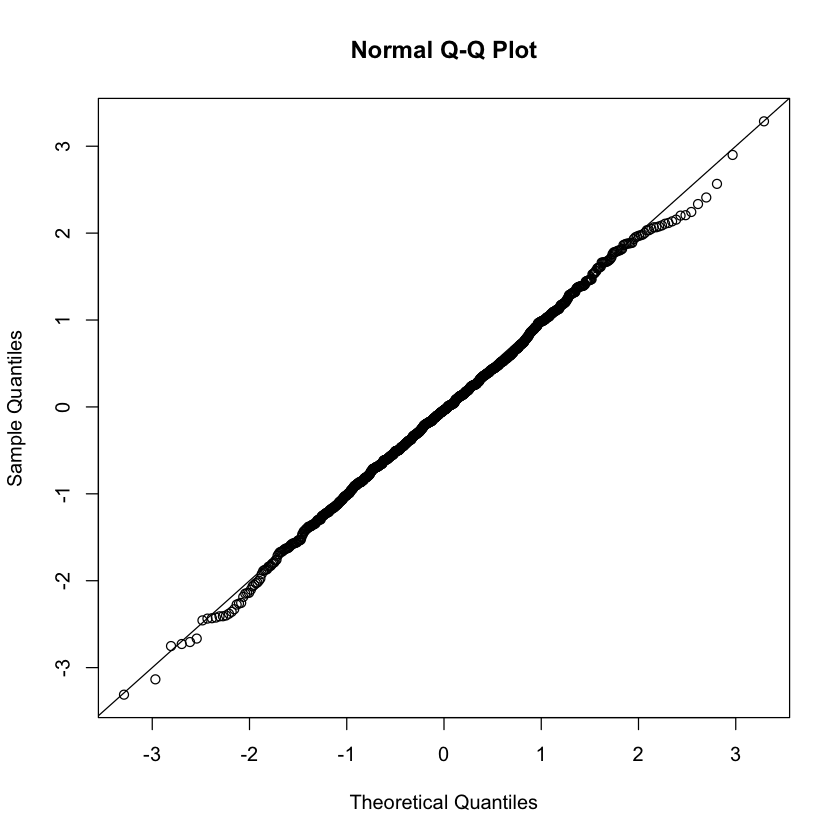

In [114]:
qqnorm(rnorm(1000,0,1))
abline(a=0,b=1)

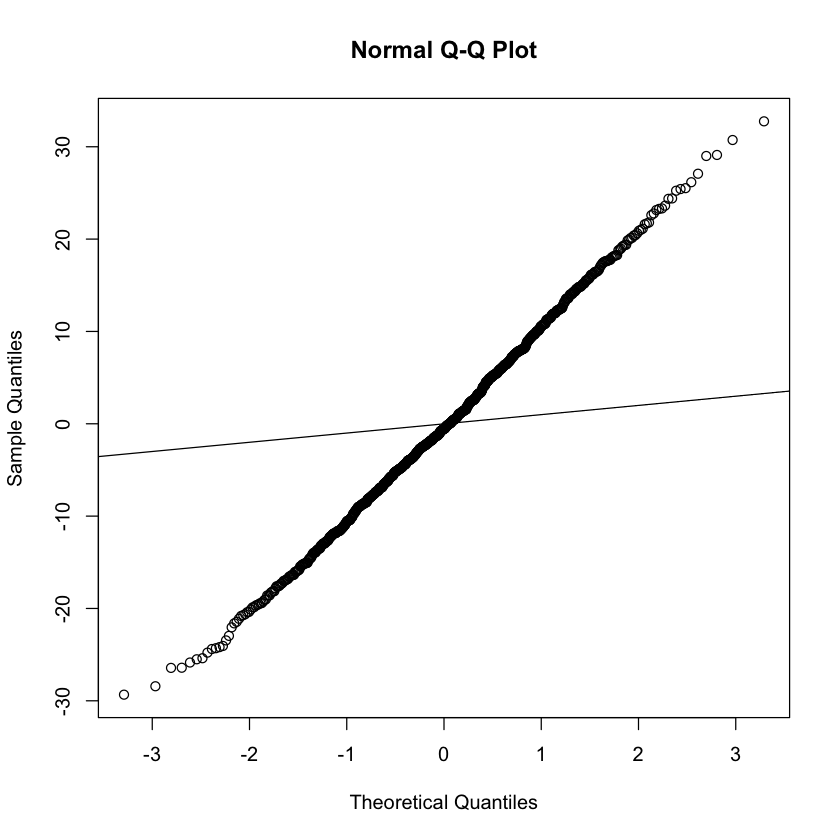

In [115]:
qqnorm(rnorm(1000,0,10))
abline(a=0,b=1)

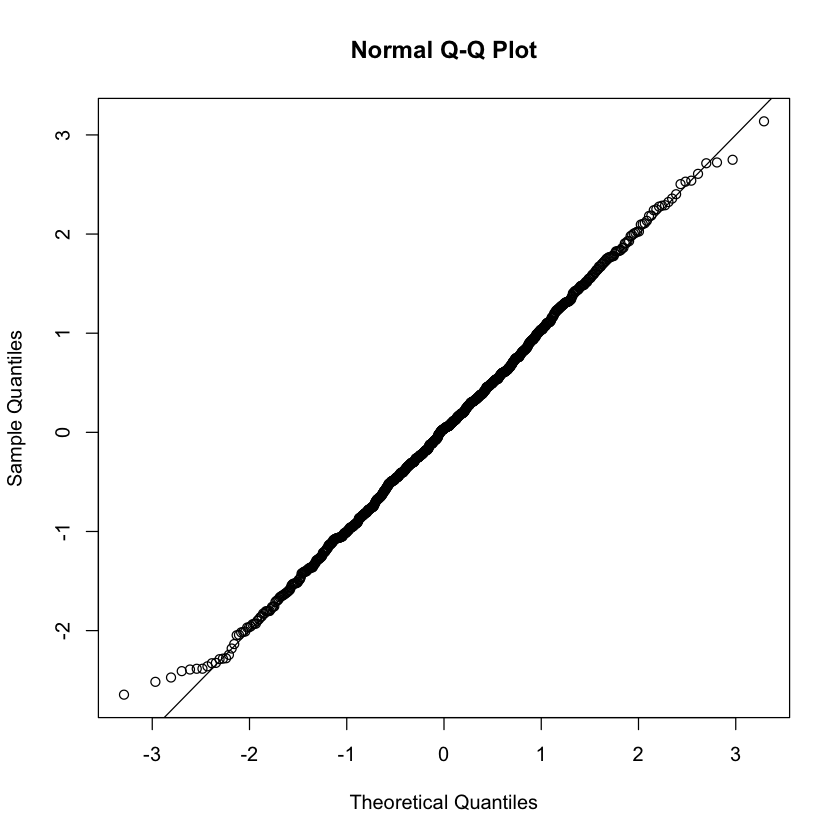

In [116]:
samples <- rnorm(1000,0,10)
qqnorm(samples/sd(samples))
abline(a=0,b=1)

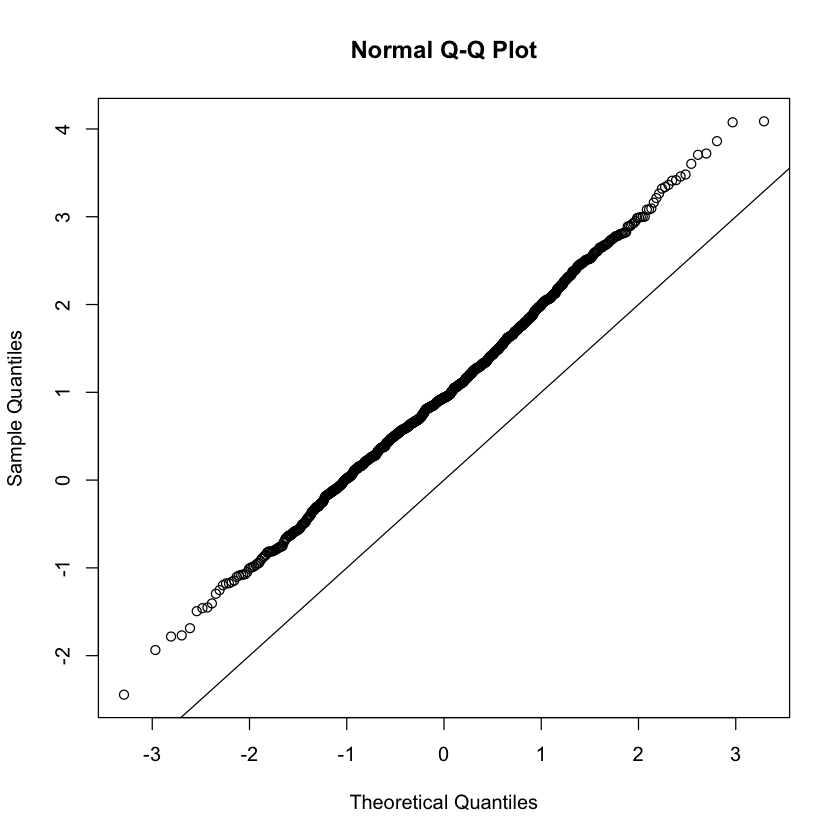

In [117]:
samples <- rnorm(1000,10,10)
qqnorm(samples/sd(samples))
abline(a=0,b=1)

# Residuals versus Fitted , Scale location

Instead of looking at a histogram of all the residuals, we can plot the fitted values ($\hat{Y}$) against the residuals. This will tell us if there is heterogeneity in the residuals by a predicted y-value or if there is a non-linear relationship. This is particularly useful for identifying a situation where we have unequal variance. 

We can obtain the residuals versus fitted plot by using the `plot` command on an `lm` object.


We also see the scale location plot. This is very similar to the residuals versus fitted except we have taken the square root of the standardized residuals (divided by variance of teh residual). 

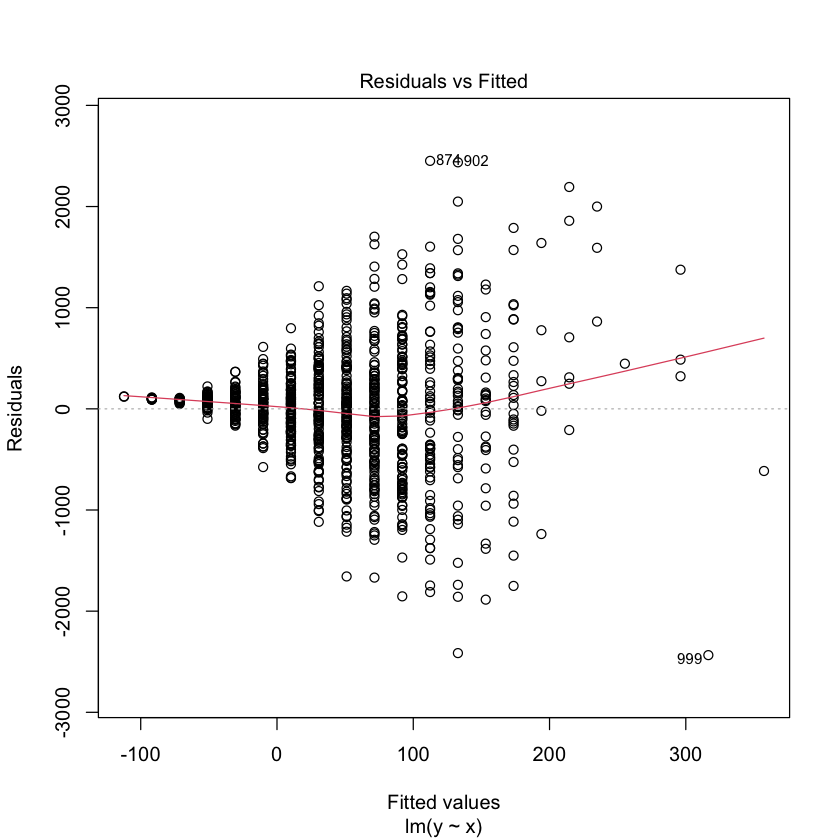

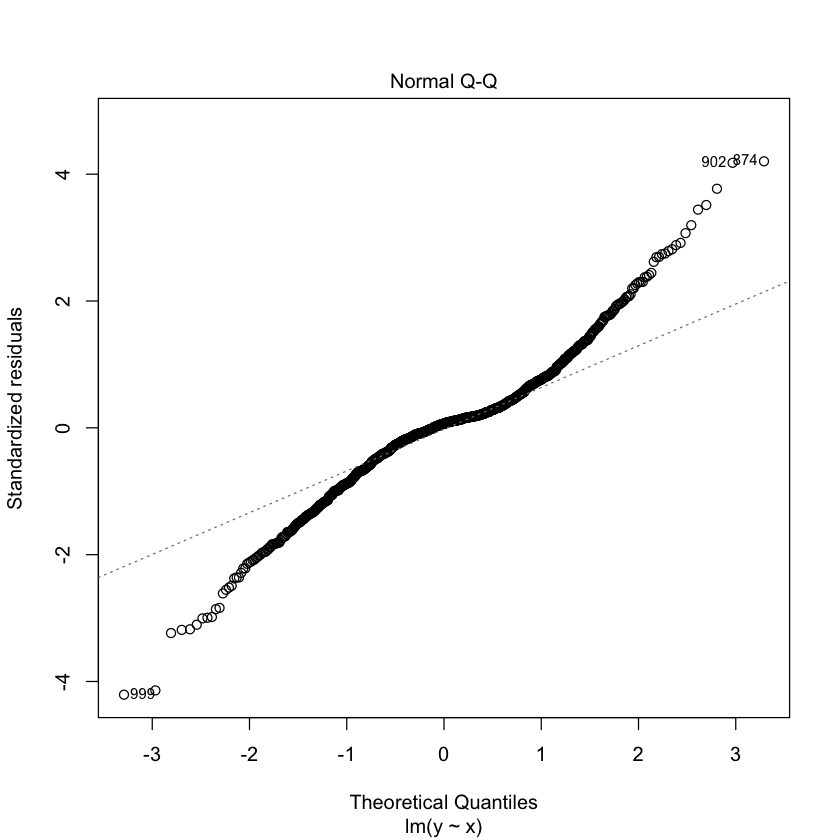

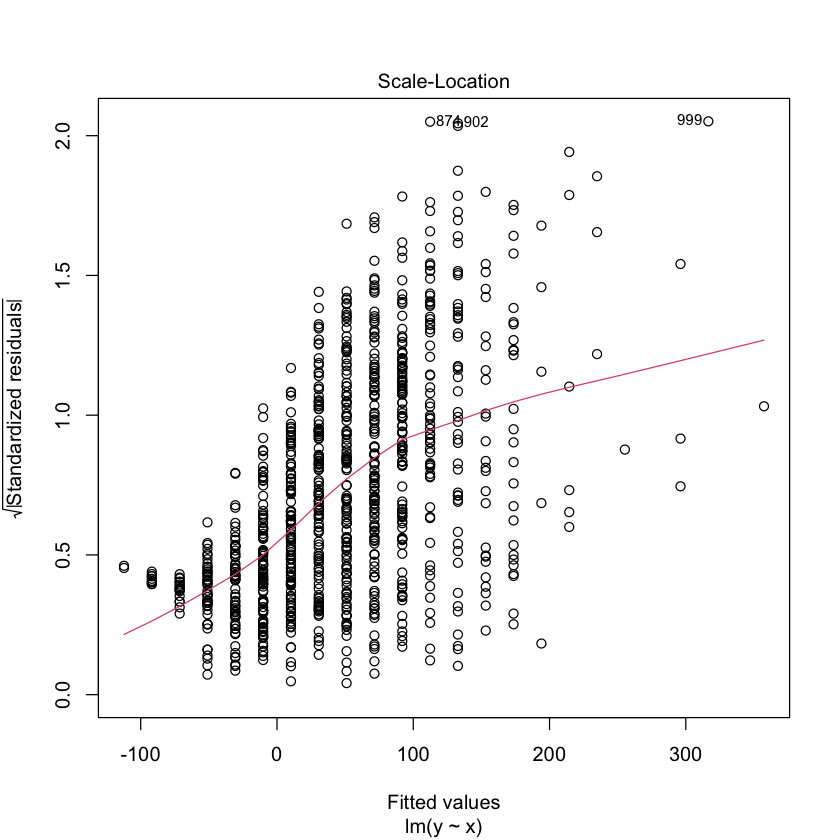

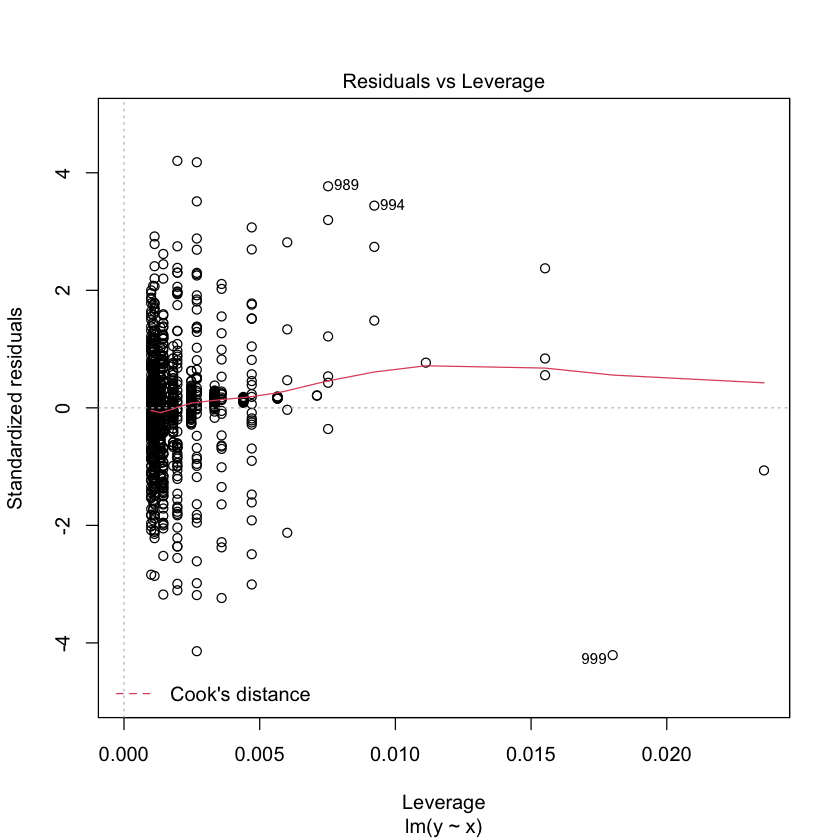

In [3]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))
#print (x)

for (i in 1:1000){
    ### y_i ~ N( 2 + 3*x_i,sigma^2)
    ### y_i ~ 2 + 3*x_i + epsilon where epsilon ~ N(0,sigma^2)
    y[i] <- rnorm(1,2 + 3*x[i],i)
}

plot(lm(y~x))

# Cooks Distance

The final diagnostic tool we will look at is Cooks distance. This is a transformation of the leverage where larger values means the observation is more influential. Cooks distance can be intuitively thought of as re-running the regression model without the outlying observation and examining how the coefficient estimates change. 

# Real data example


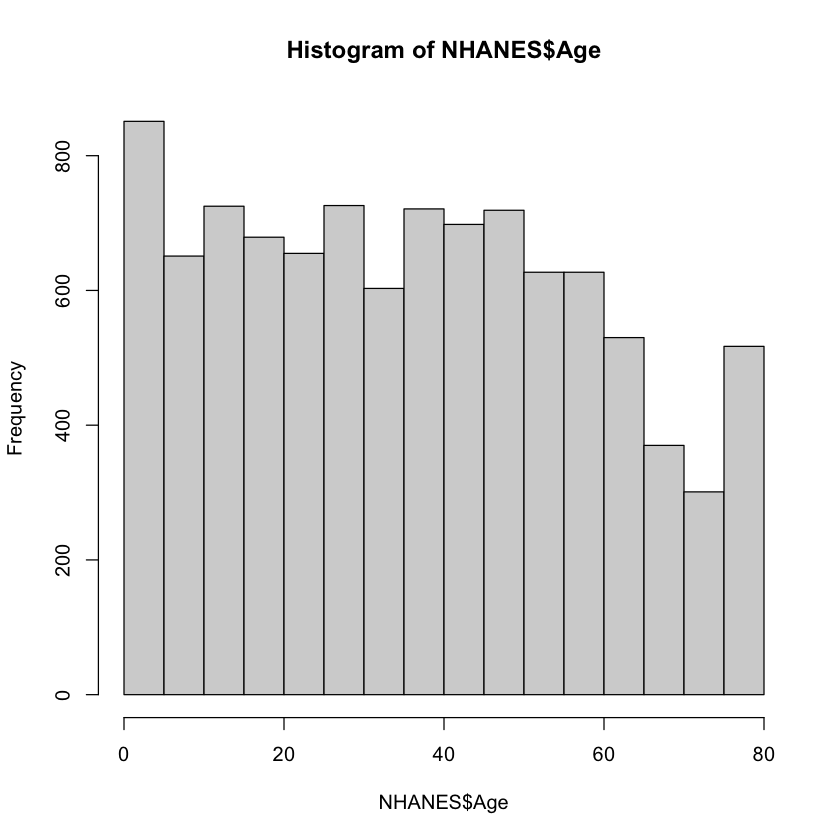

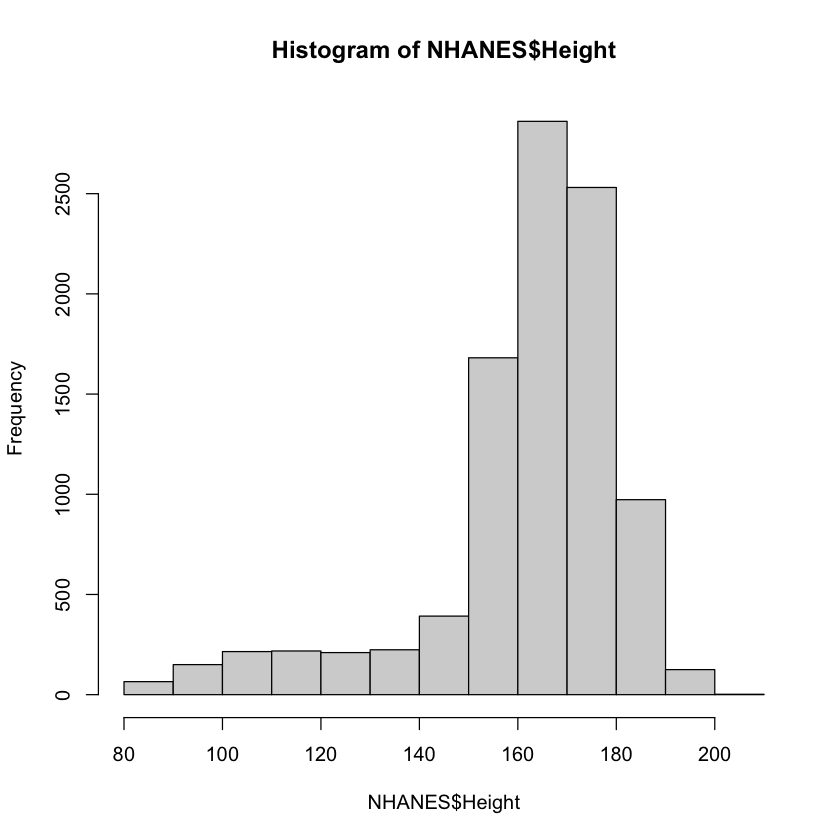

In [103]:
library(NHANES)

hist(NHANES$Age)
hist(NHANES$Height)

In [104]:
fit <- lm(Height ~ Age,data=NHANES)

In [105]:
summary(fit)


Call:
lm(formula = Height ~ Age, data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.053  -9.452   2.659  12.306  45.605 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.458e+02  3.648e-01   399.7   <2e-16 ***
Age         4.260e-01  8.369e-03    50.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.92 on 9645 degrees of freedom
  (353 observations deleted due to missingness)
Multiple R-squared:  0.2118,	Adjusted R-squared:  0.2117 
F-statistic:  2591 on 1 and 9645 DF,  p-value: < 2.2e-16


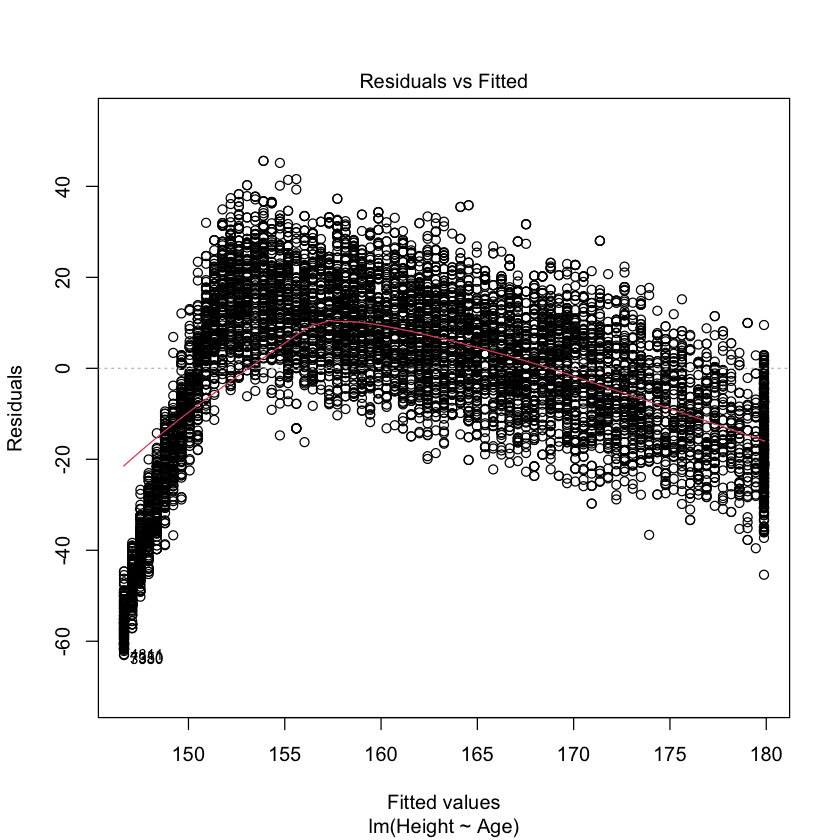

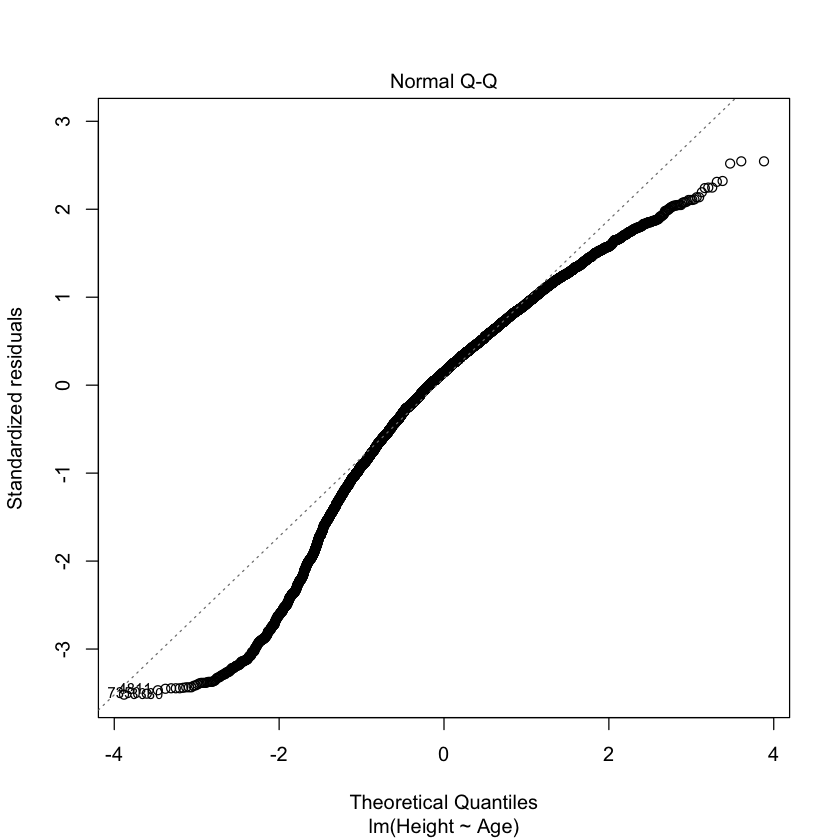

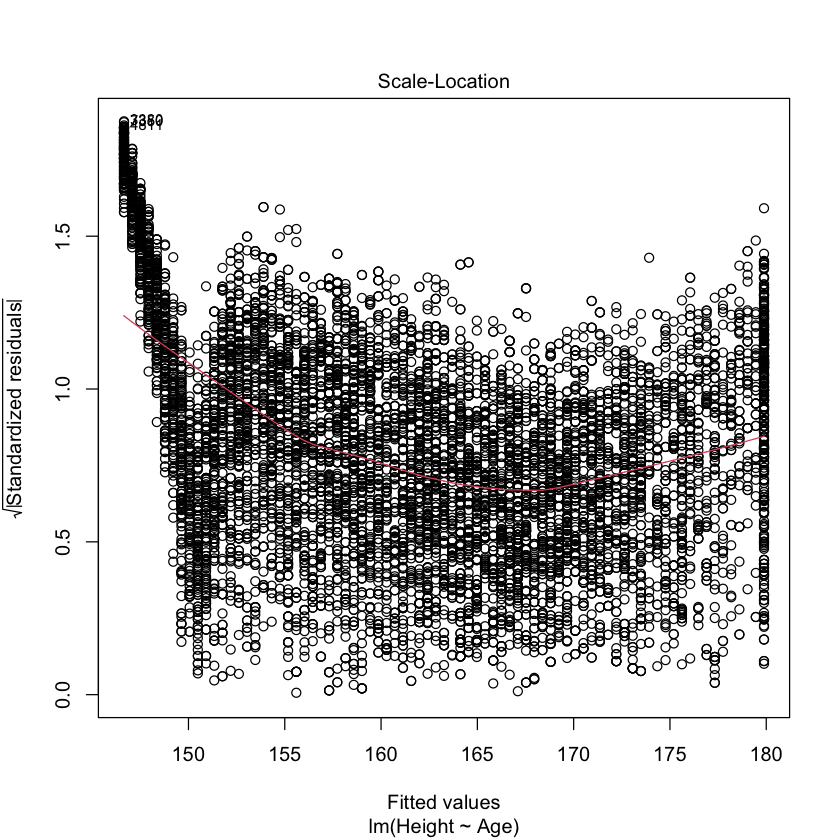

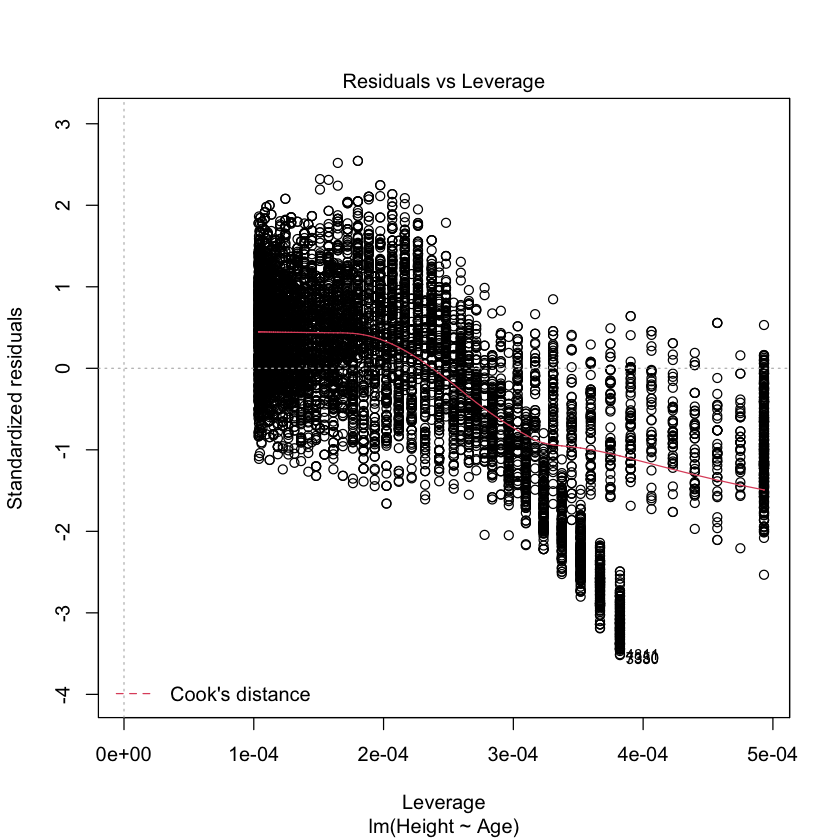

In [106]:
plot(fit)

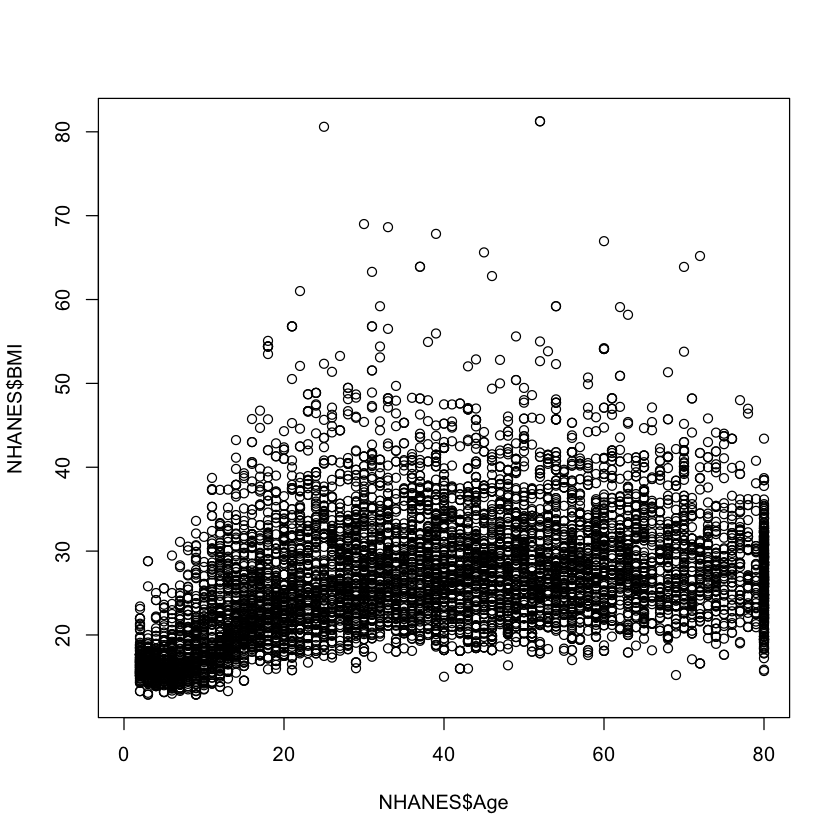

In [62]:
plot(NHANES$Age,NHANES$BMI)